# SANJEEV DAS
## Sample Super Store
---
To Check where the Store should INCREASE its focus 

And what is the Store doing wrong in which Region

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv("C:\\Users\\sanjeev\\Downloads\\SampleSuperstore.csv")
data.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [39]:
data.tail(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.60,4,0.0,13.320
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0.0,72.948


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [41]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [42]:
print("TOTAL PROFIT is",sum(data["Profit"].values))
print("TOTAL SALES is",sum(data["Sales"].values))
print("TOTAL Quantity is",sum(data["Quantity"].values))

TOTAL PROFIT is 286397.0217000013
TOTAL SALES is 2297200.860299955
TOTAL Quantity is 37873


In [19]:
west=data[data["Region"]=="West"]
east=data[data["Region"]=="East"]
south=data[data["Region"]=="South"]
central=data[data["Region"]=="Central"]

The Total Profit of West  108418.44890000018      Total Quantity supplied in West 12266
The Total Profit of East  91522.78000000026      Total Quantity supplied in East 10618
The Total Profit of South  46749.430300000065      Total Quantity supplied in South 6209
The Total Profit of Central  39706.36249999998      Total Quantity supplied in Central 8780
Total Profit  286397.0217000005
Total Quantity  37873


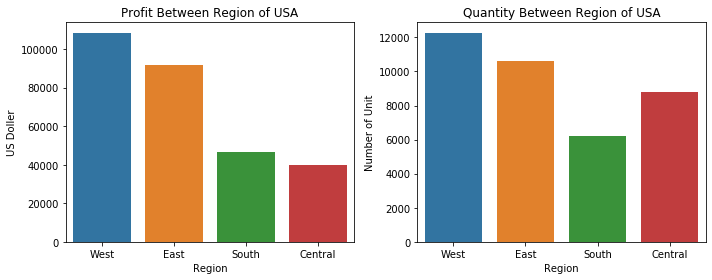

In [46]:
print("The Total Profit of West ",sum(west["Profit"].values),"     Total Quantity supplied in West",sum(west["Quantity"].values))
print("The Total Profit of East ",sum(east["Profit"].values),"     Total Quantity supplied in East",sum(east["Quantity"].values))
print("The Total Profit of South ",sum(south["Profit"].values),"     Total Quantity supplied in South",sum(south["Quantity"].values))
print("The Total Profit of Central ",sum(central["Profit"].values),"     Total Quantity supplied in Central",sum(central["Quantity"].values))
profit=[sum(west["Profit"].values),sum(east["Profit"].values),sum(south["Profit"].values),sum(central["Profit"].values)]
quantity=[sum(west["Quantity"].values),sum(east["Quantity"].values),sum(south["Quantity"].values),sum(central["Quantity"].values)]
print("Total Profit ",sum(profit))
print("Total Quantity ",sum(quantity))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=["West","East","South","Central"],y=profit)
plt.title("Profit Between Region of USA")
plt.xlabel("Region")
plt.ylabel("US Doller")
plt.subplot(1,2,2)
sns.barplot(x=["West","East","South","Central"],y=quantity)
plt.title("Quantity Between Region of USA")
plt.xlabel("Region")
plt.ylabel("Number of Unit")
plt.tight_layout()
plt.show()

### It can be seen that Central region sells more quanity still the profit earned is less


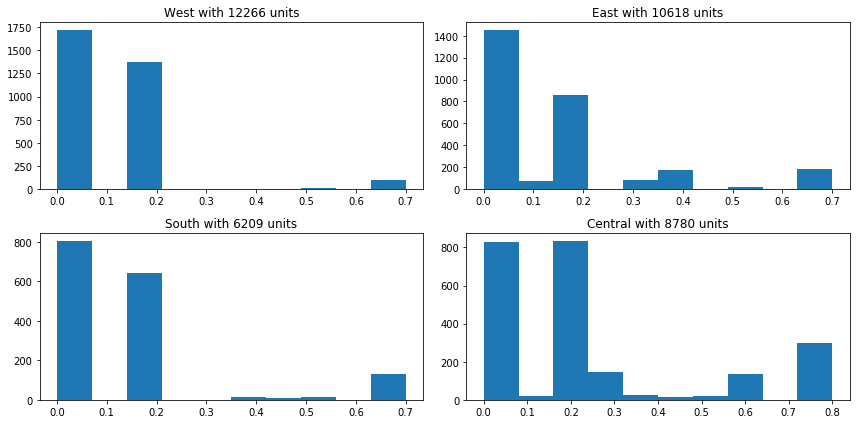

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.hist(west["Discount"])
plt.title(f"West with {quantity[0]} units")
plt.subplot(2,2,2)
plt.hist(east["Discount"])
plt.title(f"East with {quantity[1]} units")
plt.subplot(2,2,3)
plt.hist(south["Discount"])
plt.title(f"South with {quantity[2]} units")
plt.subplot(2,2,4)
plt.hist(central["Discount"])
plt.title(f"Central with {quantity[3]} units")
plt.tight_layout()
plt.show()

### It is observed that a high discount rate has Central has affected the Profit Even if they sold more Quantity of products

DISCOUNT vs PROFIT


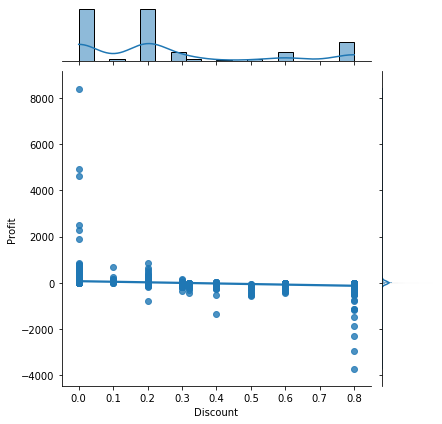

DISCOUNT vs QUANTITY


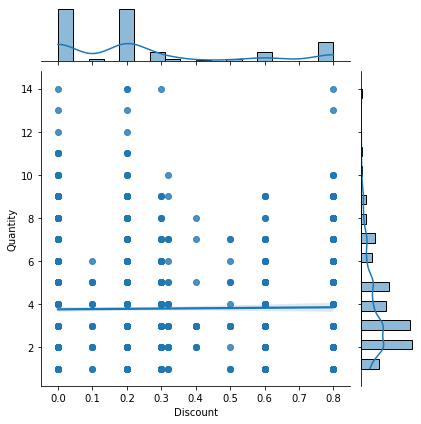

In [82]:
print("DISCOUNT vs PROFIT")
sns.jointplot(x="Discount",y="Profit",data=central,kind="reg")
plt.show()

print("DISCOUNT vs QUANTITY")

sns.jointplot(x="Discount",y="Quantity",data=central,kind="reg")
plt.show()

## This is data of the Central 
---
It can be seen that there is a weak negetive correlationship between Discount and Profit

And Discount has no effect on the number of Quantity Sold 

Lower the discount better the profit as discount doesnt affect the number of product sold
 
 ---

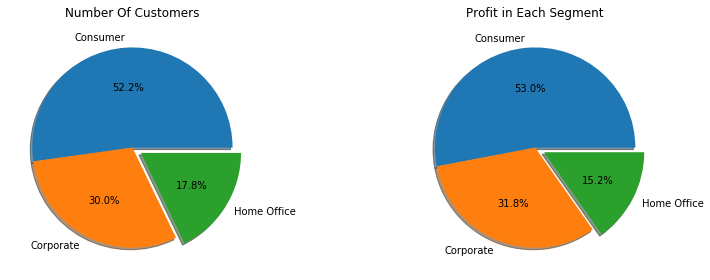

In [111]:
seg=dict(west["Segment"].value_counts())
pro=[sum(west[west["Segment"]=="Consumer"]["Profit"].values),sum(west[west["Segment"]=="Corporate"]["Profit"].values),sum(west[west["Segment"]=="Home Office"]["Profit"].values)]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pie(x=seg.values(),labels=seg.keys(),autopct='%1.1f%%',shadow=True, startangle=0,explode=(0,0, 0.1))
plt.title("Number Of Customers")
#plt.legend()
plt.subplot(1,2,2)
plt.pie(x=pro,labels=["Consumer","Corporate","Home Office"],autopct='%1.1f%%',shadow=True, startangle=0,explode=(0,0, 0.1))
plt.title("Profit in Each Segment")
plt.tight_layout()
plt.show()

### Corporate Segment gives more profit in west in compared to Home Office with the number of consumers

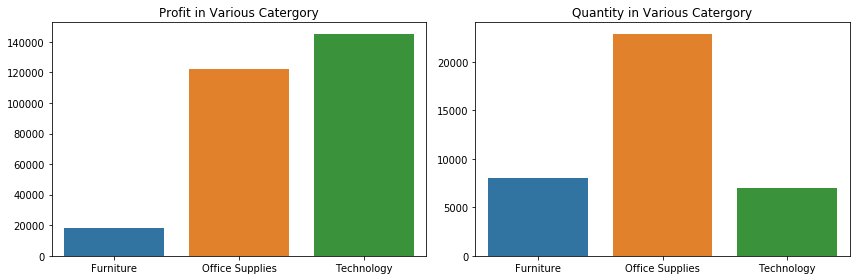

In [117]:
cato=[sum(data[data["Category"]=="Furniture"]["Profit"]),
      sum(data[data["Category"]=="Office Supplies"]["Profit"]),
      sum(data[data["Category"]=="Technology"]["Profit"])]
quant=[sum(data[data["Category"]=="Furniture"]["Quantity"]),
      sum(data[data["Category"]=="Office Supplies"]["Quantity"]),
      sum(data[data["Category"]=="Technology"]["Quantity"])]


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=["Furniture","Office Supplies","Technology"],y=cato)
plt.title("Profit in Various Catergory")
plt.subplot(1,2,2)
sns.barplot(x=["Furniture","Office Supplies","Technology"],y=quant)
plt.title("Quantity in Various Catergory")
plt.tight_layout()
plt.show()

DISCOUNT OF THE VARIOUS CATEGORY


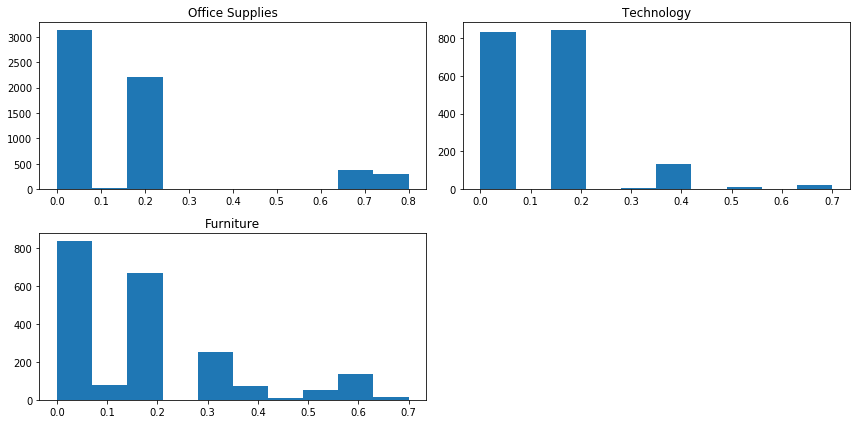

In [126]:
plt.figure(figsize=(12,6))
print("DISCOUNT OF THE VARIOUS CATEGORY")
plt.subplot(2,2,1)
plt.hist(x=data[data["Category"]=="Office Supplies"]["Discount"].values)
plt.title("Office Supplies")
plt.subplot(2,2,2)
plt.hist(data[data["Category"]=="Technology"]["Discount"].values)
plt.title("Technology")
plt.subplot(2,2,3)
plt.hist(data[data["Category"]=="Furniture"]["Discount"].values)
plt.title("Furniture")
plt.tight_layout()
plt.show()

## Technological product yeild more profit than Office Supplies even if the quantity of the it was half of that of Office Supplies .
 It can be seen that are high rate of discount given in Office Supplies .
 
 This can be a major reason of decrease in profit
 
 Furniture also gave a high amount of discount rate for the product which in turn gave less profit

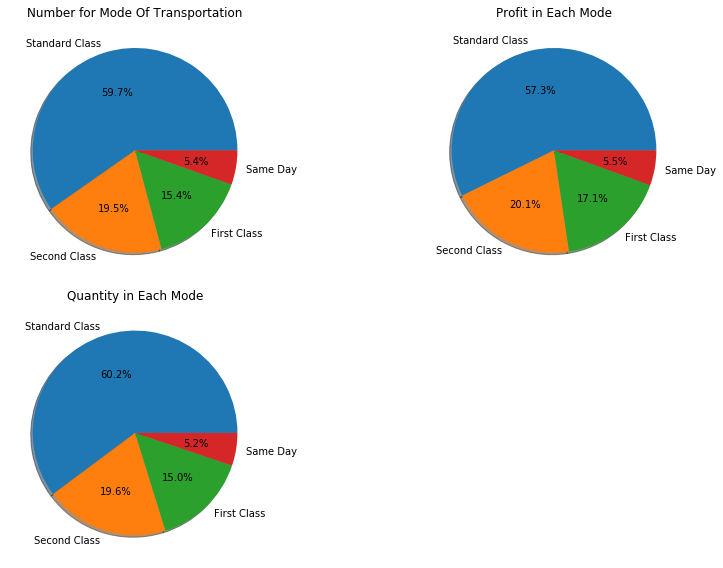

In [138]:
ship_l=[sum(data[data["Ship Mode"]=="Standard Class"]["Profit"].values),
      sum(data[data["Ship Mode"]=="Second Class"]["Profit"].values),
      sum(data[data["Ship Mode"]=="First Class"]["Profit"].values),
      sum(data[data["Ship Mode"]=="Same Day"]["Profit"].values)]
ship_d=dict(data["Ship Mode"].value_counts())


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.pie(x=ship_d.values(),labels=ship_d.keys(),autopct='%1.1f%%',shadow=True, startangle=0,explode=(0,0,0,0))
plt.title("Number for Mode Of Transportation")
#plt.legend()
plt.subplot(2,2,2)
plt.pie(x=ship_l,labels=ship_d.keys(),autopct='%1.1f%%',shadow=True, startangle=0,explode=(0,0, 0,0))
plt.title("Profit in Each Mode")


quant=[sum(data[data["Ship Mode"]== "Standard Class"]["Quantity"]),
       sum(data[data["Ship Mode"]== "Second Class"]["Quantity"]),
       sum(data[data["Ship Mode"]== "First Class"]["Quantity"]),
       sum(data[data["Ship Mode"]== "Same Day"]["Quantity"])]
plt.subplot(2,2,3)
plt.pie(x=quant,labels=ship_d.keys(),autopct='%1.1f%%',shadow=True, startangle=0,explode=(0,0, 0,0))
plt.title("Quantity in Each Mode")
plt.tight_layout()
plt.show()

DISCOUNT OF THE VARIOUS CATEGORY


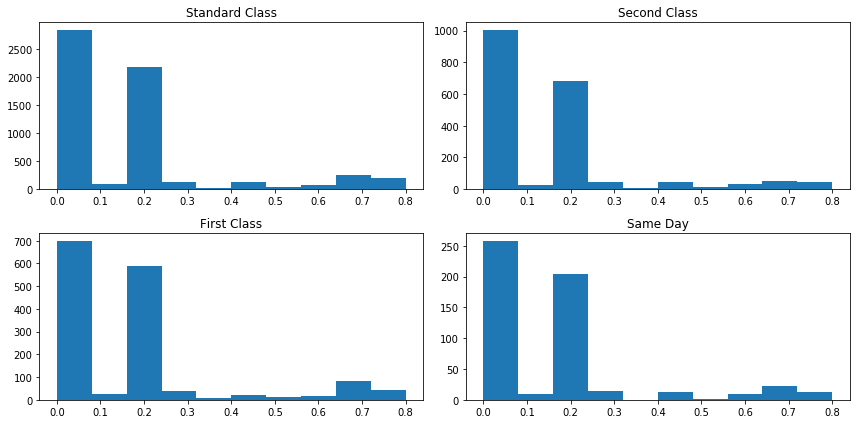

In [130]:
plt.figure(figsize=(12,6))
print("DISCOUNT OF THE VARIOUS SHIP MODE")
plt.subplot(2,2,1)
plt.hist(x=data[data["Ship Mode"]=="Standard Class"]["Discount"].values)
plt.title("Standard Class")
plt.subplot(2,2,2)
plt.hist(data[data["Ship Mode"]=="Second Class"]["Discount"].values)
plt.title("Second Class")
plt.subplot(2,2,3)
plt.hist(data[data["Ship Mode"]=="First Class"]["Discount"].values)
plt.title("First Class")
plt.subplot(2,2,4)
plt.hist(data[data["Ship Mode"]=="Same Day"]["Discount"].values)
plt.title("Same Day")
plt.tight_layout()
plt.show()

### As compared to other Mode Standard Class Had a higher number of discount
So it may have affected the contribution profit 
comparied to other mode where an increase can be seen